# Predict if someone is cannabis user

As a person with MSc in psychology and interest in data science and machine learning I was looking for psychology-related dataset. I recently found one in UCI Machine Learning Repository. The dataset and its detailed description can be find here: 

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29. 

It contains information about 1885 people: their demographic characterstics, personality traits (mostly Big Five) and usage of drugs (mostly illegal ones). According to description, there are 18 classification problems - each for every drug. I decided to focus on something *wide-spread* and not very harmful - cannabis. Its usage is even more interesting nowadays, when we are talking a lot about medical marijuana, legalization and other stuff related to it.
So let's begin...

In [84]:
#some casual imports
import pandas as pd
pd.set_option('display.max_columns', 32)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

In [85]:
#names according to dataset descption
colnames = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 
            'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
           'Heroine', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushroom', 'Nicotine', 'Semer', 'VSA']

In [86]:
len(colnames)

32

In [87]:
data = pd.read_csv('/home/grzeszo/Downloads/drugs.csv', names=colnames)

In [88]:
#this seems pretty redundant
data.drop('ID', axis=1, inplace=True)

In [89]:
#all non-drug features are already numerically encoded - imo no need to repeat this step
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroine      1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null object
LSD          1885 non-null obje

In [91]:
#are we lucky?
data.isnull().any().any()

False

In [92]:
#generally ordinal (check dataset description) but encoded as numeric 
data_n = data.iloc[:,:12]

In [93]:
#ordinal,too, but encoded as text - we need to transform them into numeric ones
data_o = data.iloc[:,12:]

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
data_o = data_o.apply(LabelEncoder().fit_transform)

In [96]:
#looks fine - note that CL5 was transforemd into 5, CL4 into 4 and so on - we can easily track them
data_o.head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


## User, that is, who?
If we are going to predict if someone is cannabis user, we need to define what the term *user* really means (at least in this case). For each drug-feature, including cannabis, we have six values: 0 - Never Used, 1 - Used over a Decade Ago, 2 - Used in Last Decade, 3 - Used in Last Year, 4 - Used in Last Month, 5 - Used in Last Week, 6 -  Used in Last Day. I decide to define user as someone who used the drug in last year (and respectively - if someone never used a drug, used in last decade or earlier, is described as non-user), hence the threshold below equals 2, but we can use more "conservative" or "liberal" one. For example, if we want to define user as someone who used drug in last decade, we change the it to > 1. Of course, you don't have to use any threshold (don't binarize) and make this multi class classfication problem. Check dataset description or original paper for more info.

In [97]:
data_o = pd.DataFrame((data_o > 2)*1) #this threshold determines who will be treated as 'user'

In [98]:
data_o.head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
#we can now combine all features in one table
data1 = pd.concat([data_n, data_o], axis=1)

In [100]:
data1.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null int64
Amphet       1885 non-null int64
Amyl         1885 non-null int64
Benzos       1885 non-null int64
Caff         1885 non-null int64
Cannabis     1885 non-null int64
Choc         1885 non-null int64
Coke         1885 non-null int64
Crack        1885 non-null int64
Ecstasy      1885 non-null int64
Heroine      1885 non-null int64
Ketamine     1885 non-null int64
Legalh       1885 non-null int64
LSD          1885 non-null int64
Meth       

In [102]:
#not really helpful, but even now we can see the user/non-user ratio (in this case, mean) for every substance.
data1.describe() 

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,0.927851,0.231300,0.070557,0.28382,0.967639,0.529973,0.976127,0.221220,0.041910,0.274271,0.062599,0.110345,0.299204,0.201592,0.169761,0.230239,0.562334,0.001592,0.050398
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,0.258802,0.421775,0.256151,0.45097,0.177003,0.499233,0.152693,0.415179,0.200436,0.446264,0.242305,0.313402,0.458031,0.401295,0.375523,0.421097,0.496231,0.039873,0.218823
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### See this 'peak' of ethnicity feature? Our dataset contains almost exclusively *white* people data. Similar case with the country - UK and US citizens definitely dominate.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c4fcd52b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7c4fb56588>]], dtype=object)

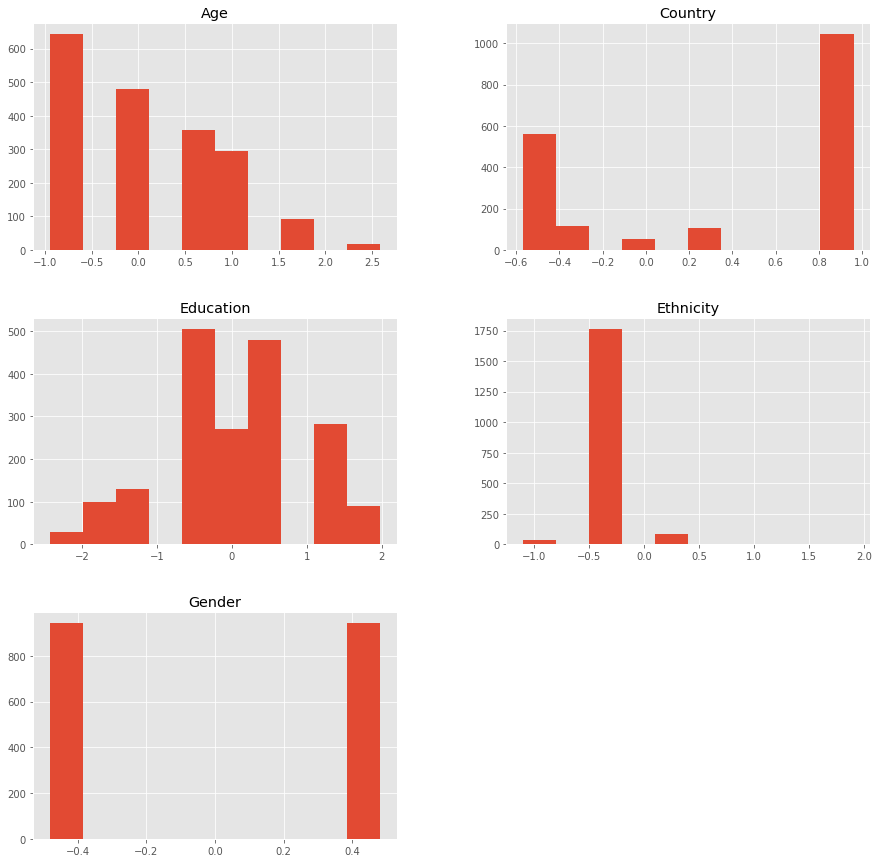

In [103]:
#plot demographical data
data1.iloc[:,:5].hist(figsize=[15,15])

### Big five personality traits are, more or less, normally distributed. Sensation seeking seem to be skewed, maybe because of large number of younger respondents

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c4f97e198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7c4f54b048>]], dtype=object)

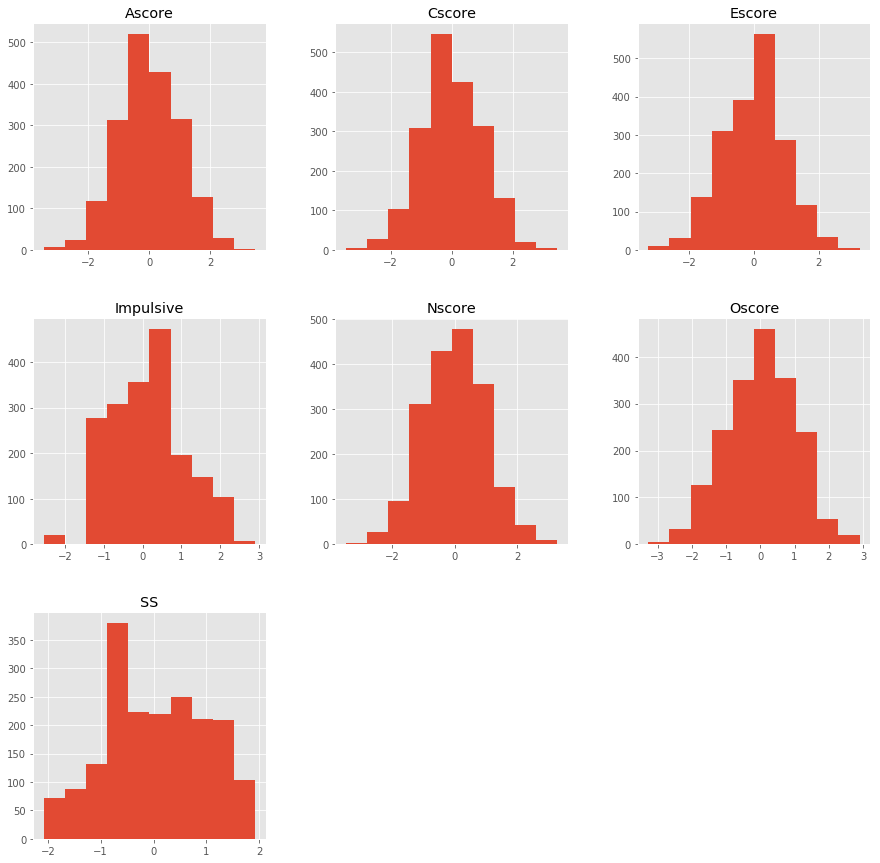

In [104]:
#plot the personality traits
data1.iloc[:,5:12].hist(figsize=[15,15])

### For cannabis (and nicotine) number of users and non-users seem to be similar - the classes are  pretty balanced. In contrast, some substances are used by almost everyone (alcohol, chocolate, caffeine) or relatively small fraction of our sample (heroine, crack)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c4f65e0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7c4ec1c240>]], dtype=object)

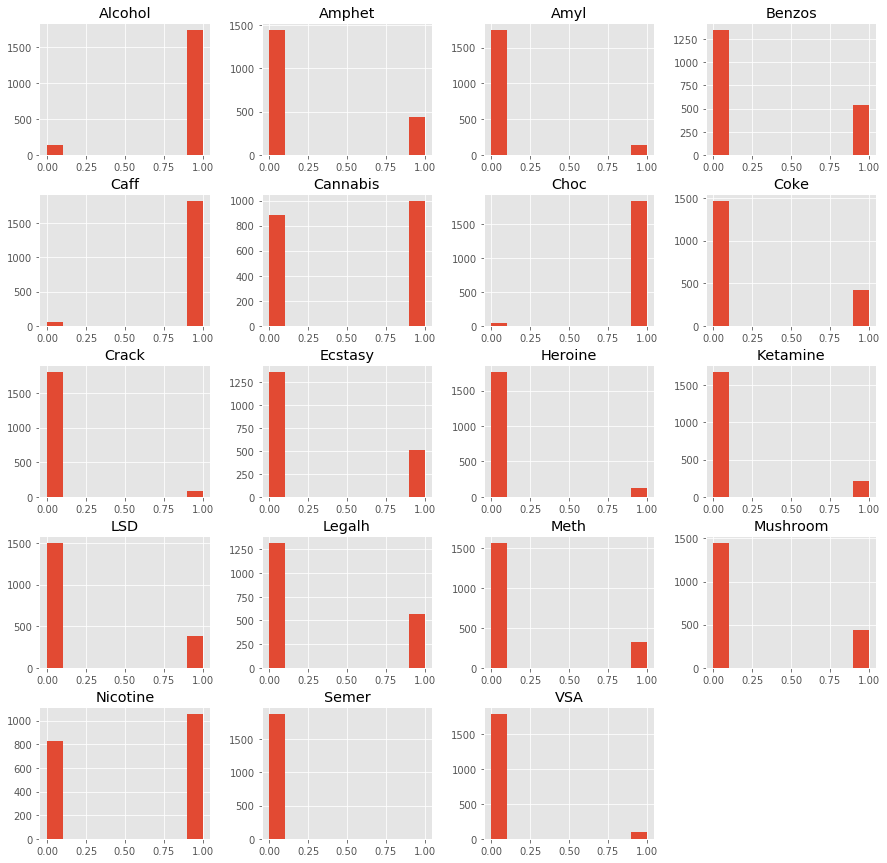

In [105]:
#plot 'drug' features
data1.iloc[:,12:].hist(figsize=[15,15])

In [106]:
#looking for someone correlation among features - this may be issue for some models
corr = data1.corr(method='kendall')

### Age, country, openness, sensation seeking, usage of amphetmine, cocaine, ecstasy, legal high, LSD, mushrooms and nicotine seem to be moderataly correlated with our target variable. We should pay attention on them. But now, let's split out dataset between target/response variable and predictors/features.

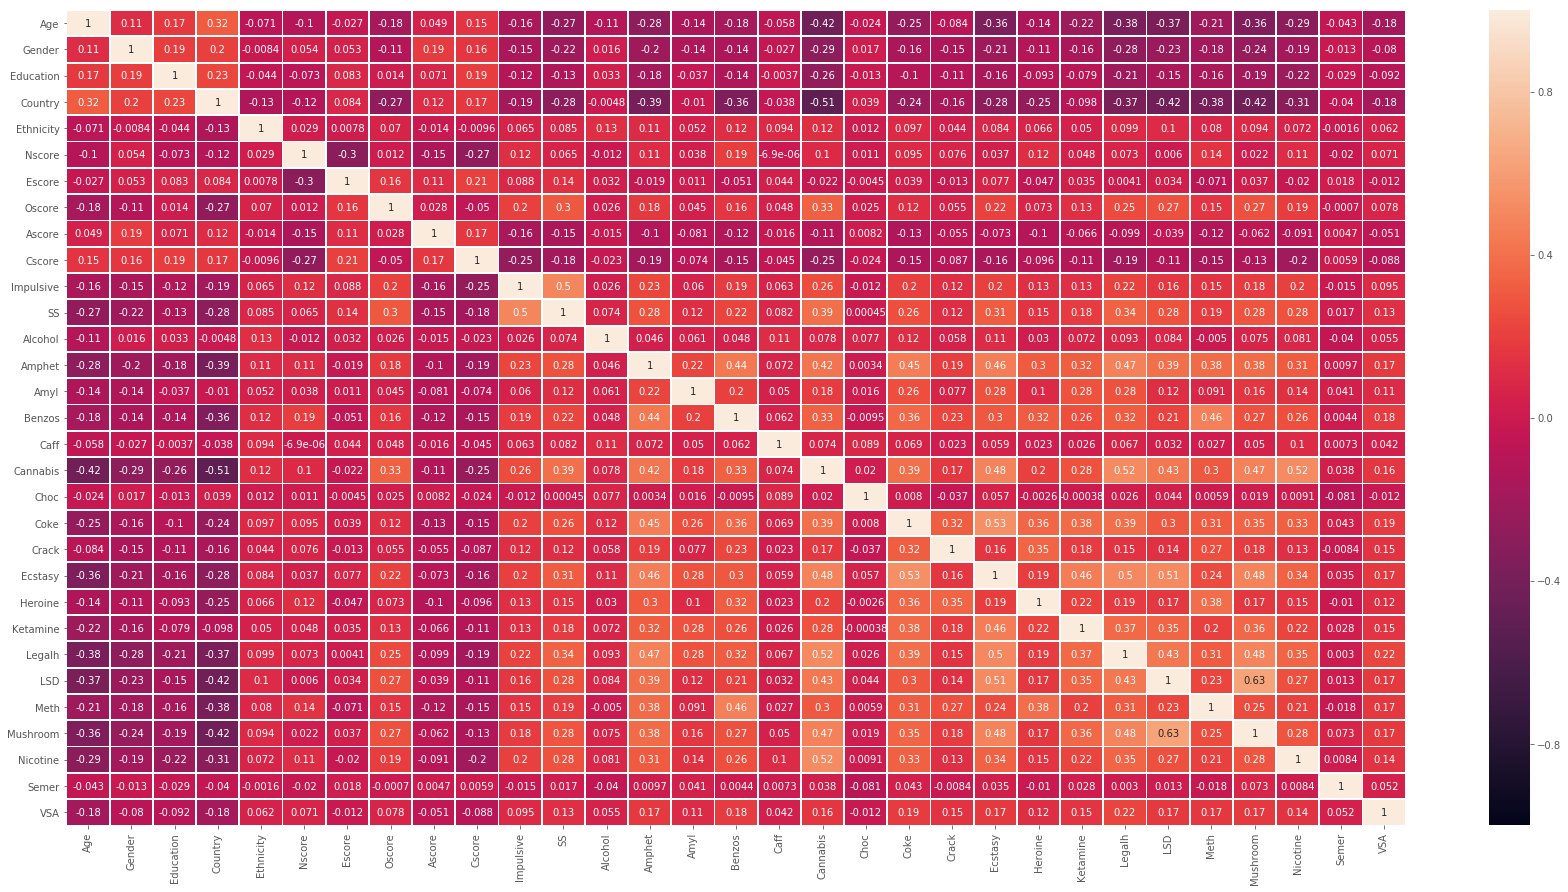

In [127]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr,
            annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            vmax=1., 
            vmin=-1., 
            linewidths=.8)

In [108]:
#if you prefer more 'numeric' perspective
#data1.corr()["Cannabis"]

In [109]:
y = data1.Cannabis

In [110]:
X = data1.drop('Cannabis', axis=1)

In [111]:
feat_labels = list(X.columns) #will be helpful later, let's keep it

In [112]:
X.head() #looks good

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Choc,Coke,Crack,Ecstasy,Heroine,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


# Random Forest

In [113]:
#we'll need that
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression 
from sklearn.model_selection import learning_curve, ShuffleSplit

In [114]:
# Setup the pipeline
num_pipeline = Pipeline([('scaler', MinMaxScaler()),
                         ('selector', SelectKBest(f_classif, k=10)), #10 is actually default, but in this case works well
                         ('RF', RandomForestClassifier(random_state=123))])


# Specify the hyperparameter space
parameters = {'RF__n_estimators':[60,128],
              'RF__max_depth' :[50,100],
              'RF__min_samples_leaf': [1,5,20],
              'RF__min_samples_split': [2,3,4]
             }

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(num_pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
y_pred_proba = cv.predict_proba(X_test)[:,1]

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9098143236074271
             precision    recall  f1-score   support

          0       0.89      0.92      0.91       177
          1       0.93      0.90      0.91       200

avg / total       0.91      0.91      0.91       377

Tuned Model Parameters: {'RF__max_depth': 50, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2, 'RF__n_estimators': 60}


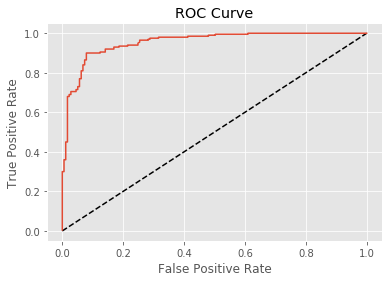

In [115]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [116]:
# Compute and print AUC score
print("AUC: {}".format((roc_auc_score(y_test, y_pred_proba)))) #pretty ok, for psychological data even better

AUC: 0.9543079096045197


In [117]:
est = cv.estimator.fit(X_train,y_train)

### Ok, our classifiers works quite well, but remember that step in pipeline when we choosed K features for our model? Let's check what features were selected and how important they are...

In [118]:
selected_features = np.array(feat_labels)[est.steps[1][1].get_support()] #what features actually were selected?

In [119]:
importance = np.array(est.steps[2][1].feature_importances_) #how important thay are?

In [120]:
list(zip(selected_features, importance))

[('Age', 0.095882516930396705),
 ('Country', 0.14658686958314102),
 ('Oscore', 0.16867537631667079),
 ('SS', 0.13556571196782838),
 ('Amphet', 0.039863822671745743),
 ('Ecstasy', 0.052093311211363527),
 ('Legalh', 0.12026942249585792),
 ('LSD', 0.044494421615978122),
 ('Mushroom', 0.074154652296642171),
 ('Nicotine', 0.12241389491037558)]

### Amphetamine, mushroom, ecstasy are not that important
We can rule them out (or reduce k - number of features). It will cost use some fraction of accuracy, but will make the model faster to train and easier to understand. To be honest - even when we reduce the number of features to 5, the model works surprisingly well.